This notebook shows an example of model comparison over key metrics, when the models are pretty much straight out of the box. However, a more rigorous approach to model selection should be applied alongside the hyper parameter tuning, as shown in the trainer_tuning.py scripts. 

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%matplotlib inline

In [4]:
import sys

In [5]:
sys.path.append('..')

In [6]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [7]:
from this_project.eda.plot import plot_roc_pr_curves
from this_project.censusdata import fetch_censusdata, make_nonlinear_preprocessor, make_nonlinear_to_linear_preprocessor

In [8]:
from sklearn import set_config
set_config(display='diagram')

In [9]:
X, y = fetch_censusdata()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Logistic Regression

In [11]:
clf_1 = make_pipeline(
    make_nonlinear_preprocessor(),
    make_nonlinear_to_linear_preprocessor(),
    LogisticRegression(C=27., max_iter=1000, class_weight='balanced', random_state=0)
)

In [29]:
clf_1.fit(X_train, y_train)

Pipeline(steps=[('featureunion-1',
                 FeatureUnion(transformer_list=[('pipeline-1',
                                                 Pipeline(steps=[('columnselector',
                                                                  ColumnSelector(columns=['workclass',
                                                                                          'education',
                                                                                          'marital_status',
                                                                                          'occupation',
                                                                                          'relationship',
                                                                                          'race',
                                                                                          'sex',
                                                                                          'native_country'])),
                                                                 ('simpleimputer',
                                                                  SimpleImputer(fill_value='MISSING',
                                                                                strategy='constant'))])),
                                                ('pipeline-2',
                                                 Pipeline(steps=[('co...
                                                                 ('simpleimputer',
                                                                  SimpleImputer(strategy='median')),
                                                                 ('standardscaler',
                                                                  StandardScaler())])),
                                                ('pipeline-3',
                                                 Pipeline(steps=[('columnselector',
                                                                  ColumnSelector(columns=[14,
                                                                                          15,
                                                                                          16,
                                                                                          17,
                                                                                          18,
                                                                                          19])),
                                                                 ('onehotencoder',
                                                                  OneHotEncoder(handle_unknown='ignore'))]))])),
                ('logisticregression',
                 LogisticRegression(C=27.0, class_weight='balanced',
                                    max_iter=1000, random_state=0))])

In [30]:
print("model score: %.3f" % clf_1.score(X_test, y_test))

model score: 0.801


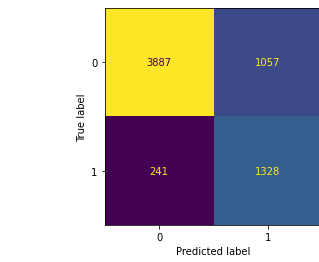

In [14]:
y_pred = clf_1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

# SVM

In [15]:
from sklearn import svm

In [16]:
clf_2 = make_pipeline(
    make_nonlinear_preprocessor(),
    make_nonlinear_to_linear_preprocessor(),
    svm.SVC(probability=True, class_weight='balanced')
)

In [18]:
clf_2.fit(X_train, y_train)

Pipeline(steps=[('featureunion-1',
                 FeatureUnion(transformer_list=[('pipeline-1',
                                                 Pipeline(steps=[('columnselector',
                                                                  ColumnSelector(columns=['workclass',
                                                                                          'education',
                                                                                          'marital_status',
                                                                                          'occupation',
                                                                                          'relationship',
                                                                                          'race',
                                                                                          'sex',
                                                                                          'native_country'])),
                                                                 ('simpleimputer',
                                                                  SimpleImputer(fill_value='MISSING',
                                                                                strategy='constant'))])),
                                                ('pipeline-2',
                                                 Pipeline(steps=[('co...
                                                 Pipeline(steps=[('columnselector',
                                                                  ColumnSelector(columns=[8,
                                                                                          9,
                                                                                          10,
                                                                                          11,
                                                                                          12,
                                                                                          13])),
                                                                 ('simpleimputer',
                                                                  SimpleImputer(strategy='median')),
                                                                 ('standardscaler',
                                                                  StandardScaler())])),
                                                ('pipeline-3',
                                                 Pipeline(steps=[('columnselector',
                                                                  ColumnSelector(columns=[14,
                                                                                          15,
                                                                                          16,
                                                                                          17,
                                                                                          18,
                                                                                          19])),
                                                                 ('onehotencoder',
                                                                  OneHotEncoder(handle_unknown='ignore'))]))])),
                ('svc', SVC(class_weight='balanced', probability=True))])

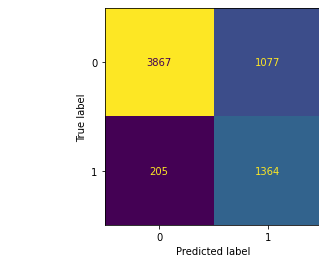

In [19]:
y_pred = clf_2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
clf_3 = make_pipeline(
    make_nonlinear_preprocessor(),
    make_nonlinear_to_linear_preprocessor(),
    RandomForestClassifier(class_weight='balanced_subsample', random_state=0)
)

In [35]:
clf_3.fit(X_train, y_train)

Pipeline(steps=[('featureunion-1',
                 FeatureUnion(transformer_list=[('pipeline-1',
                                                 Pipeline(steps=[('columnselector',
                                                                  ColumnSelector(columns=['workclass',
                                                                                          'education',
                                                                                          'marital_status',
                                                                                          'occupation',
                                                                                          'relationship',
                                                                                          'race',
                                                                                          'sex',
                                                                                          'native_country'])),
                                                                 ('simpleimputer',
                                                                  SimpleImputer(fill_value='MISSING',
                                                                                strategy='constant'))])),
                                                ('pipeline-2',
                                                 Pipeline(steps=[('co...
                                                                                          13])),
                                                                 ('simpleimputer',
                                                                  SimpleImputer(strategy='median')),
                                                                 ('standardscaler',
                                                                  StandardScaler())])),
                                                ('pipeline-3',
                                                 Pipeline(steps=[('columnselector',
                                                                  ColumnSelector(columns=[14,
                                                                                          15,
                                                                                          16,
                                                                                          17,
                                                                                          18,
                                                                                          19])),
                                                                 ('onehotencoder',
                                                                  OneHotEncoder(handle_unknown='ignore'))]))])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        random_state=0))])

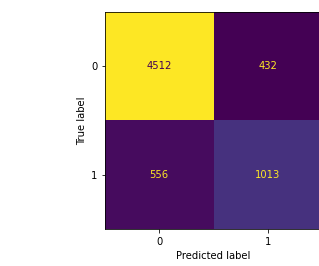

In [36]:
y_pred = clf_3.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

# Compare Model Performance

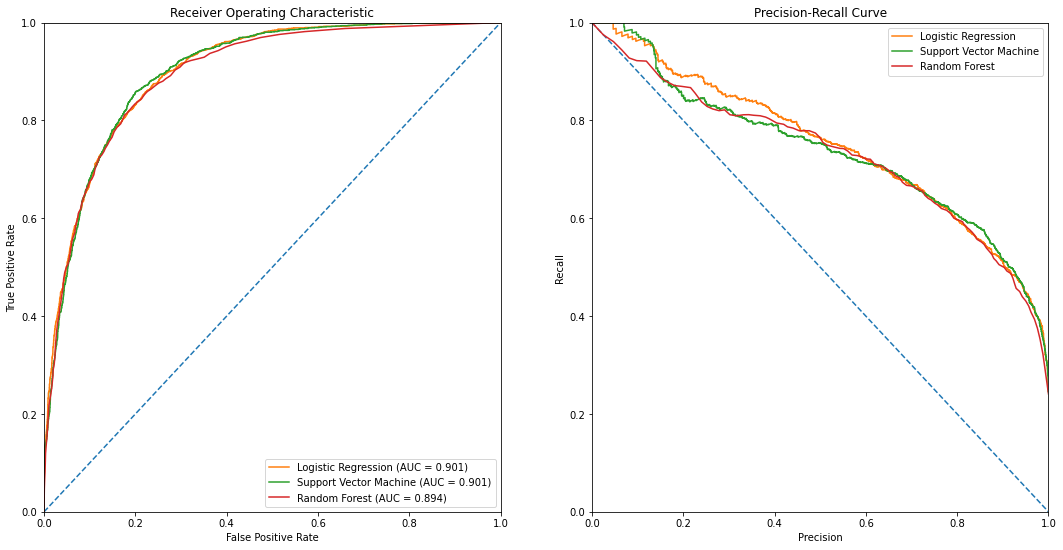

In [37]:
fig = plot_roc_pr_curves(clf_1, X_test, y_test, name="Logistic Regression")
fig = plot_roc_pr_curves(clf_2, X_test, y_test, fig=fig, name="Support Vector Machine")
fig = plot_roc_pr_curves(clf_3, X_test, y_test, fig=fig, name="Random Forest")

In [39]:
y_pred = clf_1.predict(X_test)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f'Logistic Regression -- precision: {precision:.5f}; recall: {recall:.5f}; fscore: {fscore:.5f}')

y_pred = clf_2.predict(X_test)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f'Support Vector Machine -- precision: {precision:.5f}; recall: {recall:.5f}; fscore: {fscore:.5f}')

y_pred = clf_3.predict(X_test)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f'Random Forest -- precision: {precision:.5f}; recall: {recall:.5f}; fscore: {fscore:.5f}')

Logistic Regression -- precision: 0.55681; recall: 0.84640; fscore: 0.67172
Support Vector Machine -- precision: 0.55879; recall: 0.86934; fscore: 0.68030
Random Forest -- precision: 0.70104; recall: 0.64563; fscore: 0.67220
